In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_csv('prepDS.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     912 non-null    object
 1   description                    912 non-null    object
 2   employmentType                 912 non-null    object
 3   experienceRequirements         912 non-null    object
 4   hiringOrganization             912 non-null    object
 5   identifier                     912 non-null    object
 6   industry                       911 non-null    object
 7   jobLocation                    912 non-null    object
 8   skills                         5 non-null      object
 9   title                          912 non-null    object
 10  validThrough                   912 non-null    object
 11  jobLocationType                122 non-null    object
 12  applicantLocationRequirements  122 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html,desc
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...,responsibilities build long term causal estima...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...,responsibilities and duties ayata is looking f...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee...",responsibilities responsibilities being one of...
3,2021-03-22T20:24:23.000Z,Headspace is looking for a Data Scientist to h...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Headspace I...","{'@type': 'PropertyValue', 'name': 'Headspace ...","Marketing and Advertising,Computer Software,In...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist (Remote),2021-04-21T20:24:22.000Z,TELECOMMUTE,"{'@type': 'Country', 'name': 'United States'}",NaN,NaN,<em>Headspace is looking for a Data Scientist ...,successful candidate should love complex busin...
4,2021-03-23T09:07:02.000Z,DescriptionThe AWS Applications team builds po...,FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Amazon Web ...","{'@type': 'PropertyValue', 'name': 'Amazon Web...","Computer Software,Information Technology and S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist,2021-04-22T09:07:01.000Z,NaN,NaN,"{'@type': 'MonetaryAmount', 'currency': 'USD',...",NaN,<strong><u>Description<br><br></u></strong>The...,what you will do here we are looking for a sea...


# Prepare the explanatory variables and target variable

In [3]:
# Labels
labels = df.experienceRequirements.value_counts()
labels

Entry level         442
Mid-Senior level    205
Not Applicable      153
Associate           105
Internship            5
Director              2
Name: experienceRequirements, dtype: int64

In [4]:
labels = labels.index # get the index of labels
labels = labels[:4] # pick the 1st 4 label
labels

Index(['Entry level', 'Mid-Senior level', 'Not Applicable', 'Associate'], dtype='object')

In [15]:
df = df[df.experienceRequirements.isin(labels)].copy()
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     905 non-null    object
 1   description                    905 non-null    object
 2   employmentType                 905 non-null    object
 3   experienceRequirements         905 non-null    object
 4   hiringOrganization             905 non-null    object
 5   identifier                     905 non-null    object
 6   industry                       904 non-null    object
 7   jobLocation                    905 non-null    object
 8   skills                         5 non-null      object
 9   title                          905 non-null    object
 10  validThrough                   905 non-null    object
 11  jobLocationType                122 non-null    object
 12  applicantLocationRequirements  122 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html,desc
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...,responsibilities build long term causal estima...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...,responsibilities and duties ayata is looking f...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee...",responsibilities responsibilities being one of...


In [16]:
def remove_number(s):
    return ''.join([i for i in s if not i.isdigit()])
remove_number('asdsa 3245 245 2ad asad')
df['desc'] = df.desc.apply(remove_number)

In [17]:
vectorizer = TfidfVectorizer(stop_words='english',
                             ngram_range=(1,4),
                             norm='l2'
                             )
X = vectorizer.fit_transform(df.desc)
print(vectorizer.get_feature_names()[:10])
print(X.shape)
X.toarray()[:5,:5]

['aa', 'aa dei', 'aa dei equal', 'aa dei equal opportunity', 'aa eeo', 'aa eeo employer', 'aa eeo employer united', 'aa employer', 'aa employer qualified', 'aa employer qualified individuals']
(905, 427141)


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
tfi = X.mean(0)
tfi.shape,tfi

((1, 427141),
 matrix([[2.23765484e-04, 3.99207734e-05, 3.99207734e-05, ...,
          2.03032336e-05, 2.03032336e-05, 2.03032336e-05]]))

In [19]:
tfi[tfi>0.001].shape

(1, 1330)

In [20]:
tfi = np.array(tfi>0.001).flatten()
tfi.shape

(427141,)

In [21]:
hff = np.array(vectorizer.get_feature_names())[list(tfi)]
hff.shape, hff[:5]

((1330,),
 array(['abilities', 'ability', 'ability communicate', 'ability work',
        'able'], dtype='<U57'))

In [23]:
X_df = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())
X_df = X_df[hff]

In [24]:
X_df.values.shape

(905, 1330)

In [25]:
svd = TruncatedSVD(300)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_lsa = lsa.fit_transform(X)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Explained variance of the SVD step: 52%



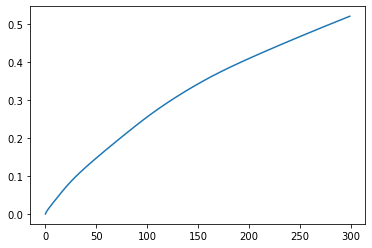

In [26]:
plt.plot(svd.explained_variance_ratio_.cumsum())

In [27]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,
                )
print("Clustering sparse data with %s" % km)
t0 = time.time()
km.fit(X_lsa)
print("done in %0.3fs" % (time.time() - t0))
print(km.labels_.shape)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
done in 0.086s
(905,)


NameError: name 'y' is not defined

In [28]:
print("Top terms per cluster:")

#original_space_centroids = svd.inverse_transform(km.cluster_centers_)
#order_centroids = original_space_centroids.argsort()[:, ::-1]
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % hff[ind], end=', ')
    print("\n")

Top terms per cluster:
Cluster 0: abilities,  ability communicate,  additional information,  address,  activities,  affirmative action employer,  collect,  clean,  basic,  causal, 

Cluster 1: abilities,  ability communicate,  additional,  compensation,  basis race,  benefits,  data science team,  common,  accommodations,  click, 

Cluster 2: abilities,  ability work,  age disability,  age,  broad,  best,  able,  collection,  bachelor degree computer science,  cutting, 

Cluster 3: abilities,  advanced statistical,  behavior,  color religion sex,  affirmative action employer,  ability work,  algorithms,  bachelor degree,  creation,  bonus, 

